In [39]:
import numpy as np
import pandas as pd
from pylab import plt, mpl 
plt.style.use('seaborn') 
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 
pd.set_option("display.precision", 4) 
np.set_printoptions(suppress=True, precision=4)

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
data = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
data.head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.5728,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.6257,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.1385,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.0828,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.2828,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.0157,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.6743,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.0928,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54
2010-01-14,29.9185,30.960,21.480,127.350,168.53,114.93,1148.46,17.63,1.4502,1142.85,48.60,112.03


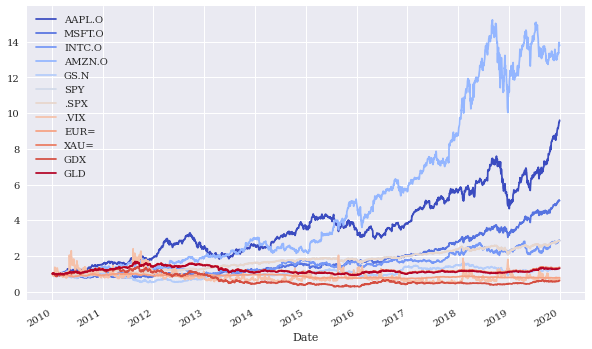

In [4]:
(data / data.iloc[0]).plot(figsize=(10, 6), cmap='coolwarm');

In [5]:
lags = 7

In [6]:
def add_lags(data, ric, lags): 
    cols = [] 
    df = pd.DataFrame(data[ric]) 
    for lag in range(1, lags + 1): 
        col = 'lag_{}'.format(lag) 
        df[col] = df[ric].shift(lag) 
        cols.append(col) 
    df.dropna(inplace=True) 
    return df, cols

In [7]:
dfs = {} 
for sym in data.columns: 
    df, cols = add_lags(data, sym, lags)
    dfs[sym] = df

In [8]:
df[sym].head(10)

Date
2010-01-13    111.540
2010-01-14    112.030
2010-01-15    110.860
2010-01-19    111.520
2010-01-20    108.940
2010-01-21    107.370
2010-01-22    107.170
2010-01-25    107.480
2010-01-26    107.560
2010-01-27    106.528
Name: GLD, dtype: float64

In [9]:
regs = {}
for sym in data.columns:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    regs[sym] = reg

In [10]:
rega = np.stack(tuple(regs.values()))

In [11]:
regd = pd.DataFrame(rega, columns=cols, index=data.columns)

In [12]:
regd

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
AAPL.O,1.0106,-0.0592,0.0258,0.0535,-0.0172,0.0060,-0.0184
MSFT.O,0.8928,0.0112,0.1175,-0.0832,-0.0258,0.0567,0.0323
INTC.O,0.9519,0.0579,0.0490,-0.0772,-0.0373,0.0449,0.0112
AMZN.O,0.9799,-0.0134,0.0206,0.0007,0.0525,-0.0452,0.0056
GS.N,0.9806,0.0342,-0.0172,0.0042,-0.0387,0.0585,-0.0215
SPY,0.9692,0.0067,0.0228,-0.0244,-0.0237,0.0379,0.0121
.SPX,0.9672,0.0106,0.0219,-0.0252,-0.0318,0.0515,0.0063
.VIX,0.8823,0.0591,-0.0289,0.0284,-0.0256,0.0511,0.0306
EUR=,0.9859,0.0239,-0.0484,0.0508,-0.0217,0.0149,-0.0055
XAU=,0.9864,0.0069,0.0166,-0.0215,0.0044,0.0198,-0.0125


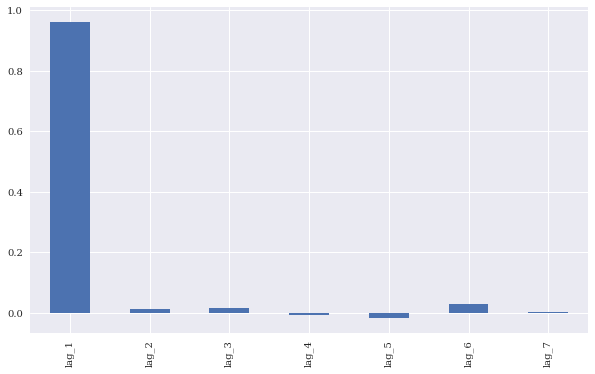

In [13]:
regd.mean().plot(kind='bar', figsize=(10, 6));

In [14]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9841,0.9815
lag_1,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867,0.9842
lag_2,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893,0.9867
lag_3,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920,0.9893
lag_4,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946,0.9920
lag_5,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972,0.9946
lag_6,0.9841,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000,0.9972
lag_7,0.9815,0.9842,0.9867,0.9893,0.9920,0.9946,0.9972,1.0000


In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(data[sym].dropna())

(-1.9488969577009914,
 0.3094193074034735,
 0,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 8446.683102944744)

In [16]:
rets = np.log(data / data.shift(1))
rets.dropna(inplace = True)

In [17]:
dfs = {}
for sym in data:
    df, cols = add_lags(rets, sym, lags)
    mu, std = df[cols].mean(), df[cols].std()
    df[cols] = (df[cols] - mu)/std
    dfs[sym] = df

In [18]:
dfs[sym].head(7)

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-14,0.0044,0.9570,-2.1692,1.3386,0.4959,-0.6434,1.6613,-0.1028
2010-01-15,-0.0105,0.4379,0.9571,-2.1689,1.3388,0.4966,-0.6436,1.6614
2010-01-19,0.0059,-1.0842,0.4385,0.9562,-2.1690,1.3395,0.4958,-0.6435
2010-01-20,-0.0234,0.5967,-1.0823,0.4378,0.9564,-2.1686,1.3383,0.4958
2010-01-21,-0.0145,-2.4045,0.5971,-1.0825,0.4379,0.9571,-2.1680,1.3384
2010-01-22,-0.0019,-1.4952,-2.4014,0.5964,-1.0824,0.4386,0.9560,-2.1679
2010-01-25,0.0029,-0.2011,-1.4929,-2.4011,0.5965,-1.0819,0.4378,0.9561


In [19]:
adfuller(dfs[sym]['lag_1'])

(-51.56825150582557,
 0.0,
 0,
 2507,
 {'1%': -3.4329610922579095,
  '5%': -2.8626935681060375,
  '10%': -2.567384088736619},
 7017.165474260226)

In [20]:
dfs[sym].corr()

,GLD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
GLD,1.0000,-0.0297,0.0003,1.2635e-02,-0.0026,-5.9392e-03,0.0099,-0.0013
lag_1,-0.0297,1.0000,-0.0305,8.1418e-04,0.0128,-2.8765e-03,-0.0053,0.0098
lag_2,0.0003,-0.0305,1.0000,-3.1617e-02,0.0003,1.3234e-02,-0.0043,-0.0052
lag_3,0.0126,0.0008,-0.0316,1.0000e+00,-0.0313,-6.8542e-06,0.0141,-0.0044
lag_4,-0.0026,0.0128,0.0003,-3.1329e-02,1.0000,-3.1761e-02,0.0002,0.0141
lag_5,-0.0059,-0.0029,0.0132,-6.8542e-06,-0.0318,1.0000e+00,-0.0323,0.0002
lag_6,0.0099,-0.0053,-0.0043,1.4115e-02,0.0002,-3.2289e-02,1.0000,-0.0324
lag_7,-0.0013,0.0098,-0.0052,-4.3869e-03,0.0141,2.1707e-04,-0.0324,1.0000


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
%%time
for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0]
    pred = np.dot(df[cols], reg)
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred))
    print(f'OLS | {sym:10s} | trafność={acc:.4f}') 

OLS | AAPL.O     | trafność=0.5056
OLS | MSFT.O     | trafność=0.5088
OLS | INTC.O     | trafność=0.5040
OLS | AMZN.O     | trafność=0.5048
OLS | GS.N       | trafność=0.5080
OLS | SPY        | trafność=0.5080
OLS | .SPX       | trafność=0.5167
OLS | .VIX       | trafność=0.5291
OLS | EUR=       | trafność=0.4984
OLS | XAU=       | trafność=0.5207
OLS | GDX        | trafność=0.5307
OLS | GLD        | trafność=0.5072
CPU times: total: 93.8 ms
Wall time: 24 ms


In [23]:
from sklearn.neural_network import MLPRegressor

In [24]:
%%time
for sym in data.columns: 
    df = dfs[sym] 
    model = MLPRegressor(hidden_layer_sizes=[512], random_state=100, 
                            max_iter=1000, early_stopping=True, 
                            validation_fraction=0.15, shuffle=False) 
    model.fit(df[cols].values, df[sym]) 
    pred = model.predict(df[cols].values) 
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) 
    print(f'MLPRegressor | {sym:10s} | trafność={acc:.4f}')

MLPRegressor | AAPL.O     | trafność=0.6005
MLPRegressor | MSFT.O     | trafność=0.5853
MLPRegressor | INTC.O     | trafność=0.5766
MLPRegressor | AMZN.O     | trafność=0.5510
MLPRegressor | GS.N       | trafność=0.6527
MLPRegressor | SPY        | trafność=0.5419
MLPRegressor | .SPX       | trafność=0.5399
MLPRegressor | .VIX       | trafność=0.6579
MLPRegressor | EUR=       | trafność=0.5642
MLPRegressor | XAU=       | trafność=0.5522
MLPRegressor | GDX        | trafność=0.6029
MLPRegressor | GLD        | trafność=0.5259
CPU times: total: 58.8 s
Wall time: 9.89 s


In [25]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [26]:
np.random.seed(100) 
tf.random.set_seed(100) 

In [27]:
def create_model(problem='regression'): 
    model = Sequential() 
    model.add(Dense(512, input_dim=len(cols), 
    activation='relu')) 
    if problem == 'regression': 
        model.add(Dense(1, activation='linear')) 
        model.compile(loss='mse', optimizer='adam') 
    else: 
        model.add(Dense(1, activation='sigmoid')) 
        model.compile(loss='binary_crossentropy', optimizer='adam') 
    return model 

In [30]:
%%time 
with tf.device('/GPU:0'):
    for sym in data.columns[:]: 
        df = dfs[sym] 
        model = create_model() 
        model.fit(df[cols], df[sym], epochs=25, verbose=False) 
        pred = model.predict(df[cols]) 
        acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) 
        print(f'Gęsta sieć neuronowa | {sym:10s} | trafność={acc:.4f}')

Gęsta sieć neuronowa | AAPL.O     | trafność=0.6100
Gęsta sieć neuronowa | MSFT.O     | trafność=0.5578
Gęsta sieć neuronowa | INTC.O     | trafność=0.6547
Gęsta sieć neuronowa | AMZN.O     | trafność=0.6029
Gęsta sieć neuronowa | GS.N       | trafność=0.5941
Gęsta sieć neuronowa | SPY        | trafność=0.5833
Gęsta sieć neuronowa | .SPX       | trafność=0.6009
Gęsta sieć neuronowa | .VIX       | trafność=0.6152
Gęsta sieć neuronowa | EUR=       | trafność=0.6264
Gęsta sieć neuronowa | XAU=       | trafność=0.5750
Gęsta sieć neuronowa | GDX        | trafność=0.6100
Gęsta sieć neuronowa | GLD        | trafność=0.5809
CPU times: total: 1min 3s
Wall time: 45.2 s


In [31]:
split = int(len(dfs[sym])*0.8)

In [33]:
%%time
for sym in data.columns: 
    df = dfs[sym] 
    train = df.iloc[:split] 
    reg = np.linalg.lstsq(train[cols], train[sym], rcond=-1)[0] 
    test = df.iloc[split:] 
    pred = np.dot(test[cols], reg) 
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred)) 
    print(f'OLS | {sym:10s} | acc={acc:.4f}') 

OLS | AAPL.O     | acc=0.5219
OLS | MSFT.O     | acc=0.4960
OLS | INTC.O     | acc=0.5418
OLS | AMZN.O     | acc=0.4841
OLS | GS.N       | acc=0.4980
OLS | SPY        | acc=0.5020
OLS | .SPX       | acc=0.5120
OLS | .VIX       | acc=0.5458
OLS | EUR=       | acc=0.4482
OLS | XAU=       | acc=0.5299
OLS | GDX        | acc=0.5159
OLS | GLD        | acc=0.5100
CPU times: total: 109 ms
Wall time: 22 ms


In [36]:
%%time 
for sym in data.columns: 
    df = dfs[sym] 
    train = df.iloc[:split] 
    model = MLPRegressor(hidden_layer_sizes=[512], 
    random_state=100, 
    max_iter=1000, 
    early_stopping=True, 
    validation_fraction=0.15, 
    shuffle=False) 
    model.fit(train[cols].values, train[sym]) 
    test = df.iloc[split:] 
    pred = model.predict(test[cols].values) 
    acc = accuracy_score(np.sign(test[sym]), np.sign(pred)) 
    print(f'MLPRegressor | {sym:10s} | trafność={acc:.4f}') 

MLPRegressor | AAPL.O     | trafność=0.4920
MLPRegressor | MSFT.O     | trafność=0.5279
MLPRegressor | INTC.O     | trafność=0.5279
MLPRegressor | AMZN.O     | trafność=0.4641
MLPRegressor | GS.N       | trafność=0.5040
MLPRegressor | SPY        | trafność=0.5259
MLPRegressor | .SPX       | trafność=0.5478
MLPRegressor | .VIX       | trafność=0.5279
MLPRegressor | EUR=       | trafność=0.4980
MLPRegressor | XAU=       | trafność=0.5239
MLPRegressor | GDX        | trafność=0.4880
MLPRegressor | GLD        | trafność=0.5000
CPU times: total: 53.2 s
Wall time: 8.88 s


In [38]:
%%time 
with tf.device('/GPU:0'):
    for sym in data.columns: 
        df = dfs[sym] 
        train = df.iloc[:split] 
        model = create_model() 
        model.fit(train[cols], train[sym], epochs=50, verbose=False) 
        test = df.iloc[split:] 
        pred = model.predict(test[cols]) 
        acc = accuracy_score(np.sign(test[sym]), np.sign(pred)) 
        print(f'Gęsta sieć neuronowa | {sym:10s} | trafność={acc:.4f}')

Gęsta sieć neuronowa | AAPL.O     | trafność=0.4841
Gęsta sieć neuronowa | MSFT.O     | trafność=0.5100
Gęsta sieć neuronowa | INTC.O     | trafność=0.4741
Gęsta sieć neuronowa | AMZN.O     | trafność=0.4980
Gęsta sieć neuronowa | GS.N       | trafność=0.5159
Gęsta sieć neuronowa | SPY        | trafność=0.5438
Gęsta sieć neuronowa | .SPX       | trafność=0.4880
Gęsta sieć neuronowa | .VIX       | trafność=0.4861
Gęsta sieć neuronowa | EUR=       | trafność=0.5219
Gęsta sieć neuronowa | XAU=       | trafność=0.4880
Gęsta sieć neuronowa | GDX        | trafność=0.4781
Gęsta sieć neuronowa | GLD        | trafność=0.5040
CPU times: total: 1min 38s
Wall time: 1min 6s
